# PROYECTO 2 - Credit Card Payment
### Modelo Naive Bayes
María Inés Vásquez Figueroa 18250\
Diana Ximena de León Figueroa 18607\
María José Castro Lemus 181202\
Paula Camila González Ortega

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,plot_roc_curve,accuracy_score, roc_curve, roc_auc_score

In [3]:
df = pd.read_csv('./datafinal.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  30000 non-null  int64  
 1   limit_bal           30000 non-null  float64
 2   sex                 30000 non-null  int64  
 3   education           30000 non-null  int64  
 4   marriage            30000 non-null  int64  
 5   age                 30000 non-null  int64  
 6   pay_sep             30000 non-null  int64  
 7   pay_ago             30000 non-null  int64  
 8   pay_jul             30000 non-null  int64  
 9   pay_jun             30000 non-null  int64  
 10  pay_may             30000 non-null  int64  
 11  pay_apr             30000 non-null  int64  
 12  bill_amt_sep        30000 non-null  float64
 13  bill_amt_ago        30000 non-null  float64
 14  bill_amt_jul        30000 non-null  float64
 15  bill_amt_jun        30000 non-null  float64
 16  bill

In [5]:
df.head()

,id,limit_bal,sex,education,marriage,age,pay_sep,pay_ago,pay_jul,pay_jun,...,bill_amt_jun,bill_amt_may,bill_amt_apr,pay_amt_sep,pay_amt_ago,pay_amt_jul,pay_amt_jun,pay_amt_may,pay_amt_apr,payment_next_month
0,1,20000.0,1,2,0,24,2,0,-1,0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,1,2,1,26,0,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,1,2,1,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,1,2,0,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,0,2,0,57,0,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [6]:
# eliminar columna con info poco valiosa
df.drop('id', axis=1, inplace=True)
var_dummies = ['education', 'marriage', 'pay_sep', 'pay_ago', 'pay_jul', 'pay_jun', 'pay_may', 'pay_apr']

for i in var_dummies:
    # convertir a variables dummies
    value_dummies = pd.get_dummies(df[i], prefix=i, drop_first=True)
    df = pd.concat([df.drop(i, axis=1), value_dummies], axis=1)

df.columns

Index(['limit_bal', 'sex', 'age', 'bill_amt_sep', 'bill_amt_ago',
       'bill_amt_jul', 'bill_amt_jun', 'bill_amt_may', 'bill_amt_apr',
       'pay_amt_sep', 'pay_amt_ago', 'pay_amt_jul', 'pay_amt_jun',
       'pay_amt_may', 'pay_amt_apr', 'payment_next_month', 'education_1',
       'education_2', 'education_3', 'education_4', 'marriage_1', 'marriage_2',
       'pay_sep_1', 'pay_sep_2', 'pay_sep_3', 'pay_sep_4', 'pay_sep_5',
       'pay_sep_6', 'pay_sep_7', 'pay_sep_8', 'pay_ago_0', 'pay_ago_1',
       'pay_ago_2', 'pay_ago_3', 'pay_ago_4', 'pay_ago_5', 'pay_ago_6',
       'pay_ago_7', 'pay_ago_8', 'pay_jul_0', 'pay_jul_1', 'pay_jul_2',
       'pay_jul_3', 'pay_jul_4', 'pay_jul_5', 'pay_jul_6', 'pay_jul_7',
       'pay_jul_8', 'pay_jun_1', 'pay_jun_2', 'pay_jun_3', 'pay_jun_4',
       'pay_jun_5', 'pay_jun_6', 'pay_jun_7', 'pay_jun_8', 'pay_may_2',
       'pay_may_3', 'pay_may_4', 'pay_may_5', 'pay_may_6', 'pay_may_7',
       'pay_may_8', 'pay_apr_2', 'pay_apr_3', 'pay_apr_4', 'pay_ap

In [7]:
X = df.drop('payment_next_month', axis=1).values
y = df['payment_next_month'].values

In [8]:
# dividir en entrenamiento y testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [11]:
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

In [13]:
def res(y_test_valid,y_train_valid):
    cm_log = confusion_matrix(y_test,y_test_valid)
    ConfusionMatrixDisplay(cm_log).plot()
    print(classification_report(y_test,y_test_valid))
    print('train_accuracy:',accuracy_score(y_train,y_train_valid))
    print('test_accuracy:',accuracy_score(y_test,y_test_valid))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      4690
           1       0.61      0.09      0.16      1310

    accuracy                           0.79      6000
   macro avg       0.70      0.54      0.52      6000
weighted avg       0.76      0.79      0.72      6000

train_accuracy: 0.787875
test_accuracy: 0.7891666666666667


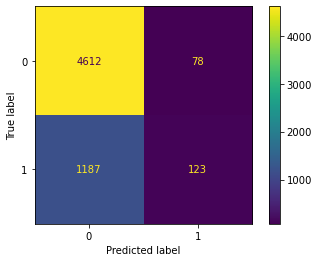

In [14]:
#se evalúa el modelo para ver la precisión de las predicciones
nb_model = GaussianNB()
nb_model.fit(x_train,y_train)
y_pred_nb = nb_model.predict(x_test)
y_pred_nb_train = nb_model.predict(x_train)
res(y_pred_nb,y_pred_nb_train)

In [24]:
cm = confusion_matrix( y_test, y_pred_nb )
print("Precisión de Gaussian = %.2f" % ((cm[0,0] + cm[1,1] )/len(x_test)))
scoresNB = cross_val_score( nb_model, x_train, y_train, cv=10)
print("Mean NaiveBayes CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scoresNB.mean(), scoresNB.std() ))

Accuracy on Test Set for NBClassifier = 0.79
Mean NaiveBayes CrossVal Accuracy on Train Set 0.79, with std=0.01


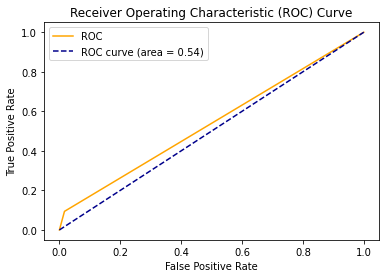

In [27]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred_nb)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_nb)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()